# Homework 1

**The following notebook is meant to help you work through Problems 1, 2, and 3 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [1]:
# Loading data; no changes needed.

import numpy as np
import matplotlib.pyplot as plt
from cmath import exp
train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

In [2]:
# These are test functions for your implementations in Questions 2.1 and 3.1; no changes needed.

def test_p2(kernel_regressor):
    """
    Run this only after you have implemented the function compute_loss, which returns the loss for a tau.
    Note that the test cases this Autograder uses are distinct from the tau values specified in the homework.
    """

    tau1, y1 = 3, [1.57, -5.04, -4.98924104, -2.74994907, -8.88]
    tau2, y2 = 90, [ 1.228045, -5.16138536, -4.16187715, -2.83729799, -8.31847509]
    tau3, y3 = 2700, [-3.46763865, -5.71861367, -4.87566622, -5.56020686, -5.18940151]

    test_pts = np.array([400, 500, 600, 700, 800])
    train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')[1:]
    year_train = train_data[:, 0] / 1000
    temp_train = train_data[:, 1]

    for tau, y in zip([tau1, tau2, tau3], [y1, y2, y3]):
        assert np.allclose(y, kernel_regressor(test_pts, tau, year_train, temp_train)), f"Failed for tau={tau}"
    
    print("Passed")

def test_p3(predict_knn):
    """
    Run this only after you have implemented the functions predict_kernel and predict_knn.
    """
    k1, y1 = 1, [1.57, -5.04, -4.99, -2.75, -8.88]
    k2, y2 = 3, [0.37333333, -5.19, -4.13, -2.63333333, -4.5]
    k3, y3 = 55, [-5.22981818, -5.22981818, -5.22981818, -5.41981818, -5.41981818]


    test_pts = np.array([400, 500, 600, 700, 800])
    train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')[1:]
    year_train = train_data[:, 0] / 1000
    temp_train = train_data[:, 1]

    for k, y in zip([k1, k2, k3], [y1, y2, y3]):
        assert np.allclose(y, predict_knn(test_pts, k, year_train, temp_train)), f"Failed for k={k}"

    print("Passed")

# Problem 2

## Problem 2 Subpart 1

In [60]:

def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_array.

    :param x_array: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param y_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    result = []
    def k_t(x, x_prime):
        val = np.exp(-np.square(x - x_prime)/tau)
        return val

    for x_curr in x_new:
        num = sum(k_t(x_train, x_curr) * y_train)
        denom = sum(k_t(x_train, x_curr))
        val = num / denom
        result.append(val)
    return result
        
    pass


In [61]:
test_p2(kernel_regressor)

Passed


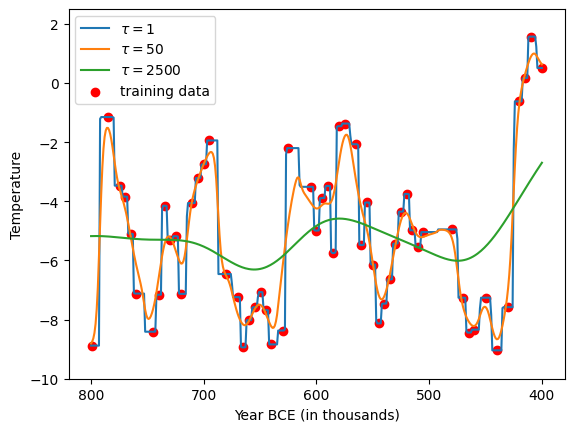

In [62]:
# plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("images/p1.2.png", bbox_inches = "tight")
plt.show()

## Problem 2 Subpart 4

In [72]:
def model_mse(predictions, true):
    n = len(predictions)
    return ((1/n) * sum(np.square(predictions - true)))
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """

    #TODO: Implement this function
    pass

In [73]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_test, tau, year_train, temp_train), temp_test)}")

tau = 1: loss = 1.9472621565209178
tau = 50: loss = 1.8582899169613452
tau = 2500: loss = 8.333886806980791


# Problem 3

## Problem 3 Subpart 1

In [45]:
# This function has been implemented for you.

def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """
    # weight matrix
    dists = np.exp(- (x_train - x_new.reshape(-1, 1)) ** 2 / 2500)
    # dividing by 2500 needed due to some stability issues at high distances

    # argsort the rows
    ix = dists.argsort(axis = 1)
    ix = ix[:, -k:] # take only the k smallest distances
    y = y_train[ix]

    # sum each row
    return np.mean(y, axis = 1)

In [46]:
test_p3(predict_knn)

Passed


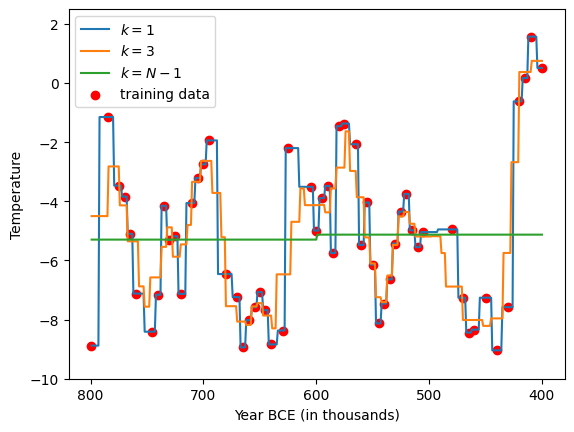

In [47]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("images/p2.1.png", bbox_inches = "tight")
plt.show()

## Problem 3 Subpart 3

In [76]:
# choose your value of k and calculate the loss
for k in [1, 3, 55, 56]:
    print(f"k = {k}: MSE loss = {model_mse(predict_knn(year_test, k, year_train, temp_train), temp_test)}")

k = 1: MSE loss = 1.7406000000000004
k = 3: MSE loss = 3.8907662222222235
k = 55: MSE loss = 9.663973240330577
k = 56: MSE loss = 9.52857144260204


In [ ]:
year_train.shape

# Problem 4

## Problem 4 Subpart 1

In [43]:
def exp_kernel(x,mu):
    return np.exp(-1/float(5)*np.power(x-mu,2))

def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X

# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`

def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  phi_X = [np.ones(X.shape).T]

  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  # Part a) has been provided for you as an example.
  if part == 'a':
    for j in range(1,10):
      phi_X.append(X**j)
    pass

  elif part=='b':
    for j in range(1, 10):
      u_j = (j+7)/8
      phi_X.append(np.exp(np.divide(np.square(X - u_j), -5)))
    pass

  elif part=='c':
    for j in range(1, 10):
      phi_X.append(np.cos(X/j))
    pass

  elif part=='d':
    for j in range(1, 50):
      phi_X.append(np.cos(X/j))
    pass

  return np.vstack(phi_X).T 

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [34]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

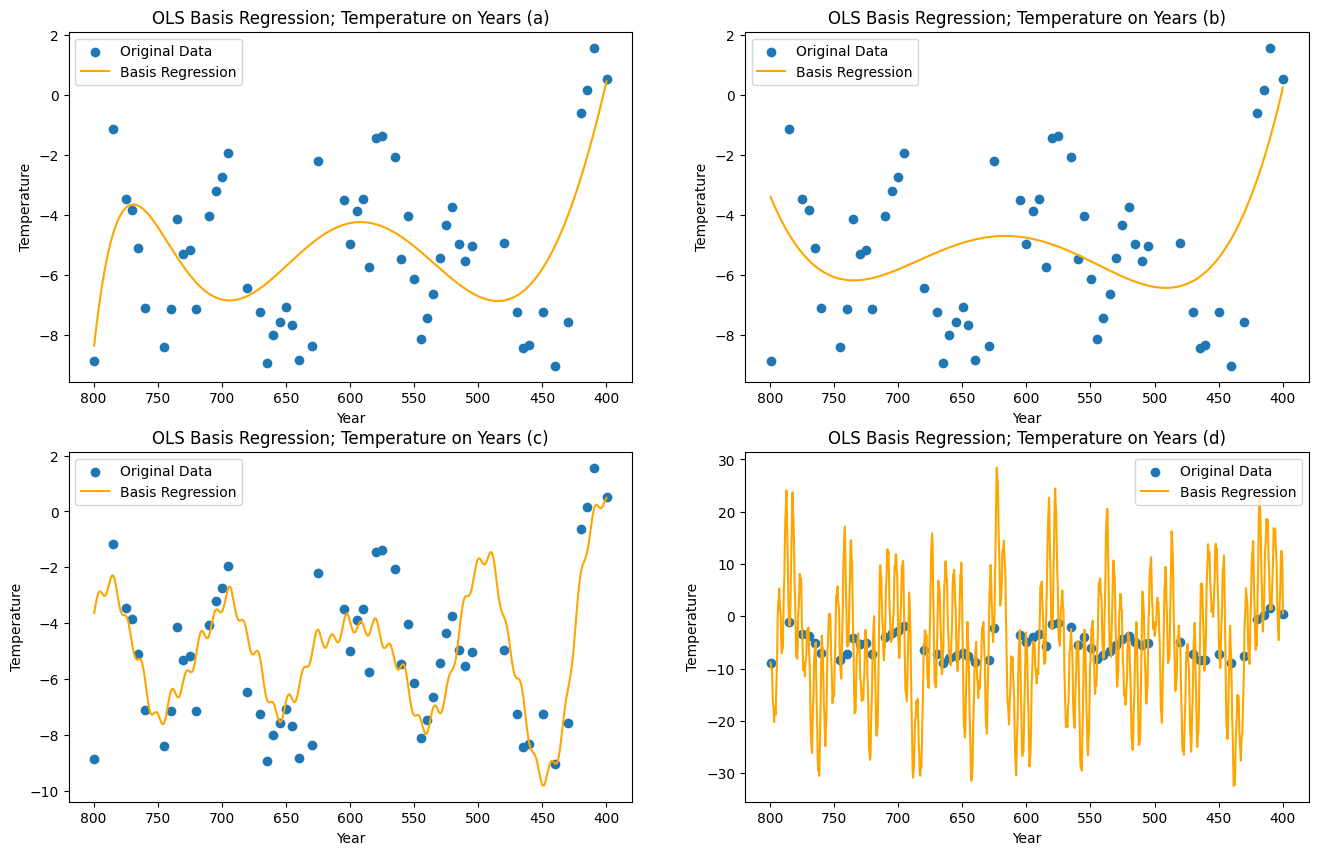

In [44]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  phi_years_train = make_basis(year_train, part)
  w = find_weights(phi_years_train, temp_train)

  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  
  xs = np.linspace(year_train.min(), year_train.max(), 1000)
  phi_xs = make_basis(xs, part)
  # y_pred = [0 for _ in xs]
  y_pred = np.dot(phi_xs, w)
  ax[i//2, i%2].plot(xs, y_pred, color = 'orange', label = "Basis Regression")
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")

  ax[i//2, i%2].legend()

  # TODO: Plot the regression line generated by your model. 
  ax[i//2, i%2].invert_xaxis()
  
plt.savefig("images/p3.1.png")
  


## Problem 4 Subpart 2

In [81]:
def mean_squared_error(X,y, w):
  # TODO: Given a linear regression model with parameter w, compute and return the mean squared error.
    y_pred = np.dot(X, w)
    return model_mse(y_pred, y)
    pass

In [82]:
for part in ['a', 'b', 'c', 'd']:
  # TODO: compute the MSE and print the results
  phi_years_train = make_basis(year_train, part)
  w = find_weights(phi_years_train, temp_train)
  y_pred_train = np.dot(phi_years_train, w)
    
  phi_years_test = make_basis(year_test, part)
  y_pred_test = np.dot(phi_years_test, w)

  # xs = np.linspace(year_train.min(), year_train.max(), 1000)
  train_mse = mean_squared_error (phi_years_train, temp_train, w)
  test_mse = mean_squared_error (phi_years_test, temp_test, w) 
  
  print(f"\nPart ({part});\n\n Train MSE: {train_mse:.2f}; Test MSE: {test_mse:.2f}\n")


Part (a);

 Train MSE: 4.82; Test MSE: 7.96


Part (b);

 Train MSE: 5.53; Test MSE: 8.71


Part (c);

 Train MSE: 2.88; Test MSE: 5.97


Part (d);

 Train MSE: 0.64; Test MSE: 58.92

